<a href="https://colab.research.google.com/github/martin-rosenfeld7/QNC_martin-rosenfeld/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

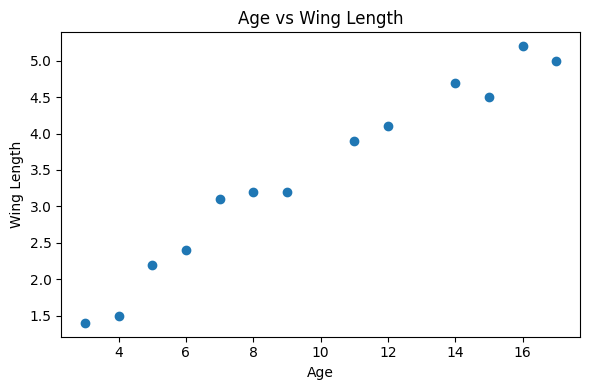

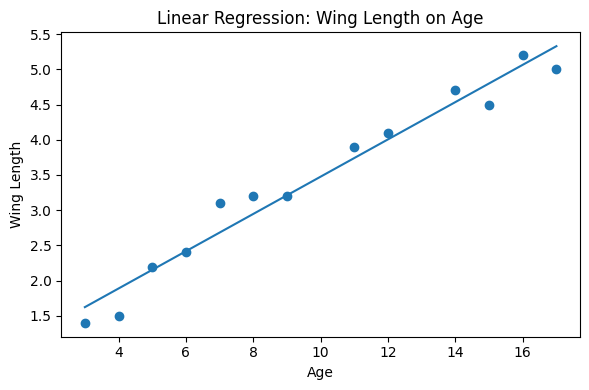

Slope b1 = 0.2647, Intercept b0 = 0.8296
Test H0: b1 = 0  ->  p-value = 3.01e-09
95% CI for slope b1: [0.2304, 0.2989]


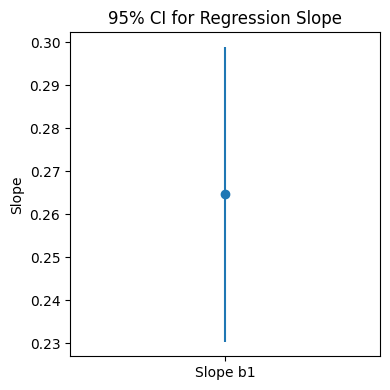

R-squared = 0.9634
Pearson's r = 0.9815


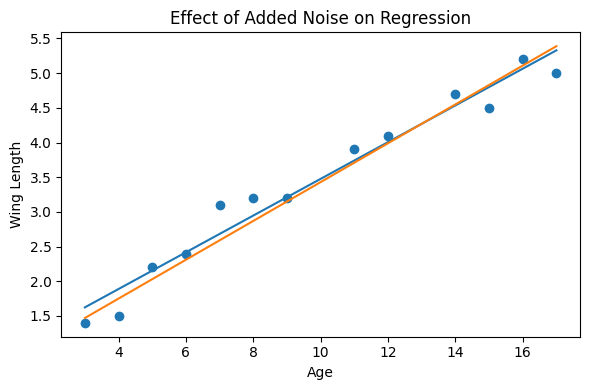

Original slope b1 = 0.2647, With noise slope b1 = 0.2799
Original r = 0.9815, With noise r = 0.9696


In [1]:
# Linear regression exercise on Age vs Wing Length
# This script does all 7 tasks and explains each line with comments.

import numpy as np                   # Import NumPy for numerical arrays and math.
import matplotlib.pyplot as plt      # Import Matplotlib for plotting (figures).
from scipy import stats              # Import SciPy stats module for regression and distributions.

# -----------------------------
# 0) Enter the data from the table in the screenshot
# -----------------------------
ages = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])   # Age values as a NumPy array.
wings = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])  # Wing length values.

n = ages.size                       # Number of observations (n) for later formulas.

# -----------------------------
# 1) Plot the relationship between Age and Wing Length (scatterplot)
# -----------------------------
plt.figure(figsize=(6,4))           # Create a new figure (single chart per figure).
plt.scatter(ages, wings)            # Draw a scatter plot of wings (y) vs ages (x).
plt.title("Age vs Wing Length")     # Set a plot title.
plt.xlabel("Age")                   # Label the x-axis.
plt.ylabel("Wing Length")           # Label the y-axis.
plt.tight_layout()                  # Adjust layout so labels fit nicely.
plt.show()                          # Display the scatter plot.

# -----------------------------
# 2) Calculate and plot the regression line
# -----------------------------
lin = stats.linregress(ages, wings)  # Run simple linear regression: y = b0 + b1*x.
b1 = lin.slope                        # Extract slope (b1).
b0 = lin.intercept                    # Extract intercept (b0).
r = lin.rvalue                        # Pearson correlation (signed).
p_slope = lin.pvalue                  # p-value testing H0: slope = 0.
se_b1 = lin.stderr                    # Standard error of the slope.

# Create points along the x-axis to draw the fitted line.
x_line = np.linspace(ages.min(), ages.max(), 200)  # 200 x values spanning the observed range.
y_line = b0 + b1 * x_line                          # Predicted y values using the regression equation.

# Plot the scatter again with the regression line overlaid.
plt.figure(figsize=(6,4))            # New figure for this plot.
plt.scatter(ages, wings)             # Scatter of observed data.
plt.plot(x_line, y_line)             # Plot the fitted regression line.
plt.title("Linear Regression: Wing Length on Age")  # Title.
plt.xlabel("Age")                    # X label.
plt.ylabel("Wing Length")            # Y label.
plt.tight_layout()                   # Tidy layout.
plt.show()                           # Display.

# -----------------------------
# 3) Test H0: slope (b1) = 0
# -----------------------------
# The linregress output already provides the p-value for this test.
# We'll print the result in a readable way.
print(f"Slope b1 = {b1:.4f}, Intercept b0 = {b0:.4f}")
print(f"Test H0: b1 = 0  ->  p-value = {p_slope:.4g}")

# -----------------------------
# 4) 95% Confidence interval for the slope and a simple "slope + CI" plot
# -----------------------------
alpha = 0.05                                        # Set significance level for 95% CI.
df = n - 2                                          # Degrees of freedom for simple linear regression.
tcrit = stats.t.ppf(1 - alpha/2, df)                # t critical value for two-sided 95% CI.
ci_low = b1 - tcrit * se_b1                         # Lower bound of the CI for the slope.
ci_high = b1 + tcrit * se_b1                        # Upper bound of the CI for the slope.
print(f"95% CI for slope b1: [{ci_low:.4f}, {ci_high:.4f}]")

# Plot the point estimate of slope with its 95% CI as an error bar.
plt.figure(figsize=(4,4))                           # New figure.
plt.errorbar([0], [b1], yerr=[[b1 - ci_low], [ci_high - b1]], fmt='o')  # Error bar centered at b1.
plt.xticks([0], ["Slope b1"])                       # Label the single x-position.
plt.ylabel("Slope")                                 # Y label.
plt.title("95% CI for Regression Slope")            # Title.
plt.tight_layout()                                  # Layout.
plt.show()                                          # Display.

# -----------------------------
# 5) r^2 (coefficient of determination)
# -----------------------------
r_squared = r**2                                    # r^2 is the square of Pearson's r for simple linear regression.
print(f"R-squared = {r_squared:.4f}")

# -----------------------------
# 6) Pearson's r
# -----------------------------
# linregress already returned r; we print it explicitly.
print(f"Pearson's r = {r:.4f}")

# -----------------------------
# 7) Add noise to the data and see how the regression changes
# -----------------------------
rng = np.random.default_rng(42)                     # Create a random generator with a fixed seed for reproducibility.
noise_sd = 0.4                                      # Set the standard deviation of the noise to add (adjust as desired).
wings_noisy = wings + rng.normal(0.0, noise_sd, size=n)  # Add Gaussian noise to the original wing lengths.

# Fit regression on the noisy data
lin_noisy = stats.linregress(ages, wings_noisy)     # Regression on noisy targets.
b1_noisy = lin_noisy.slope                          # New slope with noise.
b0_noisy = lin_noisy.intercept                      # New intercept with noise.

# Make a line for the noisy fit
y_line_noisy = b0_noisy + b1_noisy * x_line         # Predicted y from noisy fit across x_line grid.

# Plot original data and both regression lines to compare
plt.figure(figsize=(6,4))                           # New figure.
plt.scatter(ages, wings)                            # Scatter of the original data.
plt.plot(x_line, y_line)                            # Original regression line.
plt.plot(x_line, y_line_noisy)                      # Noisy regression line.
plt.title("Effect of Added Noise on Regression")    # Title.
plt.xlabel("Age")                                   # X label.
plt.ylabel("Wing Length")                           # Y label.
plt.tight_layout()                                  # Layout.
plt.show()                                          # Display.

# Print numerical comparison
print(f"Original slope b1 = {b1:.4f}, With noise slope b1 = {b1_noisy:.4f}")
print(f"Original r = {r:.4f}, With noise r = {lin_noisy.rvalue:.4f}")
